In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [3]:
X

array([[-7.44900795, -1.78522537],
       [-6.0174373 , -0.87067413],
       [-3.83747978, -4.25790757],
       ...,
       [ 5.63144816,  7.57811854],
       [ 4.27901712,  7.90683599],
       [-3.89477035, -5.93579141]])

In [4]:
y

array([1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1,
       2, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1,
       0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1, 2,
       2, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 0, 0, 2,
       0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1, 1,
       0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1,
       2, 0, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0,
       1, 2, 1, 1, 0, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1,

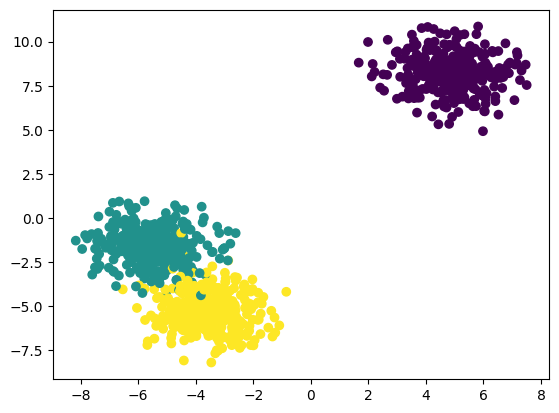

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)

## Standardization

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = StandardScaler()

In [9]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.cluster import KMeans

## Elbow Method to select K values

In [12]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[1340.0000000000007,
 120.62218214198293,
 50.644402297866286,
 43.90981072333909,
 36.94757392514701,
 30.2168115363926,
 27.485950159090073,
 24.556372613411288,
 22.25166848751268,
 21.690418990999053]

## Plot Elbow Curve

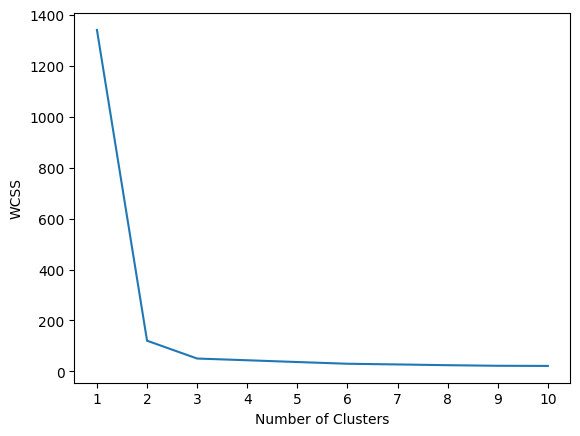

In [15]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [31]:
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit_predict(X_train_scaled)

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,

In [32]:
y_pred = kmeans.predict(X_test_scaled)

In [33]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

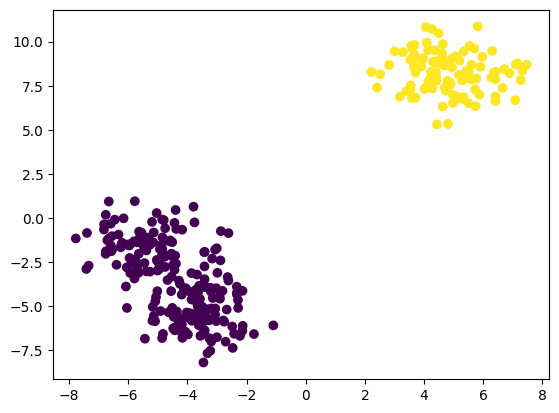

In [34]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)

## K Value Validation
- Knee Locator
- Silhoutee Scoring

In [20]:
# Kneelocator
!pip install kneed


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from kneed import KneeLocator

In [22]:
kl= KneeLocator(range(1,11), wcss, curve="convex", direction='decreasing')

In [24]:
kl.elbow

2

In [25]:
# Silhoutee Scoring
from sklearn.metrics import silhouette_score

In [27]:
sil_coeff = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    sil_coeff.append(score)

In [28]:
sil_coeff

[0.8222251295147671,
 0.6782595037938441,
 0.5875957723312545,
 0.5339000977673276,
 0.3570077143877842,
 0.3365464603167578,
 0.3430242550276863,
 0.32913747837267393,
 0.34516684985533125]

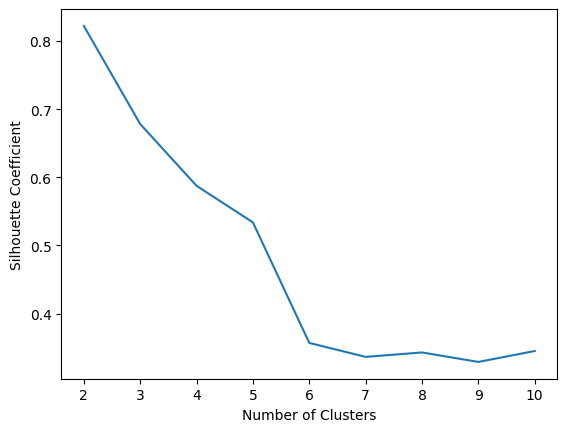

In [30]:
plt.plot(range(2,11), sil_coeff)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()